## Анализ успеваемости студентов на образовательной платформе

### Задача:

Изучение данных по прохождению студентами тестов на образовательной платформе с целью выявления ключевых факторов, влияющих на успеваемость. Данные будут использоваться для разработки персонализированных ИИ-ассистентов, которые помогут студентам в обучении.

### Описание проекта:

Этот проект фокусируется на анализе данных, собранных с образовательной платформы. Анализ будет проведен с помощью библиотеки pandas для выявления взаимосвязей между различными характеристиками студентов и их успеваемостью. В результате исследования будут определены факторы, влияющие на успеваемость, что позволит в дальнейшем разработать персонализированные ИИ-ассистенты для повышения эффективности обучения.

### План работы:

**1. Загрузка и предварительный анализ данных:**
   * Импортировать необходимые библиотеки (pandas, numpy, matplotlib, seaborn).
   * Загрузить данные из файлов train.csv, lectures.csv, questions.csv.
   * Провести предварительный анализ данных (проверить типы данных, просмотреть первые строки, найти пропущенные значения, описательную статистику).
     
**2. Анализ ключевых характеристик:**
   * Провести анализ следующих характеристик:
     - `timestamp`: время, прошедшее с момента первого взаимодействия пользователя с платформой.
     - `user_id`: идентификатор пользователя.
     - `content_id`: идентификатор взаимодействия (вопрос или лекция).
     - `content_type_id`: тип взаимодействия (0 - вопрос, 1 - лекция).
     - `task_container_id`: идентификатор блока вопросов или лекций.
     - `user_answer`: ответ пользователя на вопрос (если есть).
     - `answered_correctly`: правильность ответа пользователя (если есть).
     - `prior_question_elapsed_time`: среднее время ответа пользователя на вопросы в предыдущем блоке (если есть).
     - `prior_question_had_explanation`: был ли у пользователя доступ к объяснению после предыдущего блока вопросов (если есть).

**3. Визуализация данных:**
* Построить графики, чтобы визуализировать взаимосвязь между различными характеристиками и успеваемостью студентов.

**4. Анализ результатов и выводы:**

* Сформулировать выводы на основе анализа данных и полученных результатов.
* Определить ключевые факторы, влияющие на успеваемость студентов.

### Описание данных:

**файл train.csv:**

* `row_id (int64)`: ID кода строки.
* `timestamp (int64)`: Время в миллисекундах, прошедшее между этим взаимодействием пользователя и первым событием завершения от этого пользователя.
* `user_id (int32)`: ID кода пользователя.
* `content_id (int16)`: ID кода взаимодействия пользователя.
* `content_type_id (int8)`: 0, если событие было задано пользователю, 1, если событие было просмотром лекции.
* `task_container_id (int16)`: ID кода для блока вопросов или лекций.
* `user_answer (int8)`: Ответ пользователя на вопрос, если есть. Читать -1 как null для лекций.
* `answered_correctly (int8)`: Если пользователь ответил правильно. Читать -1 как null для лекций.
* `prior_question_elapsed_time (float32)`: Среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос в предыдущем пакете вопросов, игнорируя любые лекции между ними. Null для первого пакета вопросов или лекции пользователя. Обратите внимание, что время - это среднее время, которое пользователь потратил на решение каждого вопроса в предыдущем пакете.
* `prior_question_had_explanation (bool)`: Видел ли пользователь объяснение и правильный ответ (ы) после ответа на предыдущий пакет вопросов, игнорируя любые лекции между ними. Значение общее для одного пакета вопросов и равно null для первого пакета вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, были частью диагностического теста onboarding, где они не получали никакой обратной связи.

**файл lectures.csv:**

* `lecture_id (int16)`: ID кода лекции.
* `part (int8)`: Номер части курса.
* `tag (str)`: Тег для лекции.

**файл questions.csv:**
* `question_id (int16)`: ID кода вопроса.
* `bundle_id (int16)`: ID кода блока вопросов.
* `correct_answer (int8)`: Правильный ответ на вопрос.
* `part (int8)`: Номер части курса.
* `tags (str)`: Тег для вопроса.

## Шаг 1. Загрузка и предварительный анализ данных

#### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

#### Загрузим данные из файлов train.csv, lectures.csv, questions.csv.

In [2]:
drive.mount('/content/drive')
train = pd.read_csv("/content/drive/My Drive/train.csv", chunksize=10000000) # из-за большого размера используем chunksize
# читаем файл "lectures.csv" в DataFrame lectures
lectures = pd.read_csv("/content/drive/My Drive/lectures.csv")
# читаем файл "questions.csv" в DataFrame questions
questions = pd.read_csv("/content/drive/My Drive/questions.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Загрузили три датасета: train.csv, lectures.csv и questions.csv. Из-за значительного размера файла train.csv мы используем pd.read_csv с параметром chunksize=10000000, что позволяет загружать данные по частям, избегая перегрузки памяти. Загруженный "кусок" (chunk) будет содержать 10 миллионов строк.*

#### Проведем предварительный анализ данных

**Проверка размеров файлов**

In [3]:
# итерируемся по частям DataFrame train
for chunk in train:
    # печатаем количество строк и столбцов текущей части DataFrame
    print("Train:")
    print(f"Количество строк: {chunk.shape[0]}, количество столбцов: {chunk.shape[1]}") # форма: (строки, столбцы)
    # выходим из цикла после обработки первой части
    break

print("\nLectures:")
print(f"Количество строк: {lectures.shape[0]}, количество столбцов: {lectures.shape[1]}") # shape[0] - количество строк, shape[1] - количество столбцов
print("\nQuestions:")
print(f"Количество строк: {questions.shape[0]}, количество столбцов: {questions.shape[1]}") # shape[0] - количество строк, shape[1] - количество столбцов

Train:
Количество строк: 10000000, количество столбцов: 10

Lectures:
Количество строк: 418, количество столбцов: 4

Questions:
Количество строк: 13523, количество столбцов: 5


*В результате загрузки данных мы получили три датасета: `Train`, `Lectures` и `Questions`.  Анализ их размеров показывает существенную разницу в объеме данных.*

*`Train`: Этот датасет является самым большим, содержащим 10 000 000 строк и 10 столбцов.  Его значительный размер потребовал использования  chunksize при загрузке, чтобы избежать проблем с памятью.*

*`Lectures`:  Этот датасет значительно меньше, содержащий всего 418 строк и 4 столбца. Его размер позволяет загрузить его целиком без каких-либо проблем с памятью.*

*`Questions`:  Размер этого датасета находится между `Train` и `Lectures`, содержа 13 523 строки и 5 столбцов.  Он также может быть загружен целиком без проблем.*

**Просмотрим первые строки**

In [4]:
# Выводим первые 5 строк текущей части train.csv
chunk.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [5]:
# Выводим первые 5 строк DataFrame lectures.
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [6]:
# Выводим первые 5 строк DataFrame questions
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


*Таблица `train`: Первые пять строк демонстрируют данные о взаимодействии пользователей с контентом.  Видно, что столбцы содержат идентификаторы пользователей (user_id), контента (content_id), тип контента (content_type_id),  ответы пользователей (user_answer),  флаг правильности ответа (answered_correctly), а также информацию о времени, затраченном на предыдущий вопрос (prior_question_elapsed_time), и о наличии объяснения к предыдущему вопросу (prior_question_had_explanation).  Заметно, что значения timestamp и row_id  представляют собой последовательные номера.*

*Таблица `lectures`: Первые пять строк показывают информацию о лекциях, включая их идентификатор (lecture_id), теги (tag),  часть (part) и тип (type_of). Данные показывают наличие разных типов лекций, обозначенных в столбце type_of, таких как "concept" и "solving question".*

*Таблица `questions`:  Первые пять строк таблицы questions содержат данные о вопросах,  включая их идентификатор (question_id),  id набора (bundle_id), правильный ответ (correct_answer), часть (part), и теги (tags). Теги, по-видимому, представляют собой комбинации чисел, которые, предположительно, указывают на тематическую принадлежность вопроса.*

**Посмотрим информацию о типах данных в таблицах**

In [7]:
# Выводим информацию о DataFrame 'lectures'
print("Информация о таблице train:\n")
chunk.info()
print("\n-------------------------\n")
# Выводим информацию о DataFrame 'lectures'
print("Информация о таблице lectures:\n")
lectures.info()
print("\n-------------------------\n")
# Выводим информацию о DataFrame 'questions'
print("Информация о таблице questions:\n")
questions.info()

Информация о таблице train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 762.9+ MB

-------------------------

Информация о таблице lectures:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lect

*Таблица `train`:  Большинство столбцов имеют целочисленный тип (int64), что характерно для идентификаторов и счетчиков (например, row_id, user_id, content_id).  Столбец prior_question_elapsed_time имеет тип с плавающей точкой (float64), что логично для времени, которое может принимать нецелые значения.  Столбец prior_question_had_explanation  — это единственный столбец с типом object, вероятно, представляющий собой булевы значения ("True"/"False" или 1/0) в текстовом представлении. Это требует дальнейшего исследования и потенциального преобразования в  bool или числовой тип для удобства анализа.*

*Таблица `lectures`:  Три столбца (lecture_id, tag, part) имеют целочисленный тип (int64), тогда как столбец type_of является объектом (object),  представляя, скорее всего, различные категории типов лекций (текстовые значения).*

*Таблица `questions`:  Похожая ситуация с таблицей questions:  question_id, bundle_id, correct_answer, и part являются целочисленными (int64). Столбец tags  —  объектный тип (object), который,  скорее всего, содержит теги в текстовом формате, возможно, разделенные запятыми или другим разделителем.  Это также требует дальнейшего анализа и предобработки.*

**Посмотрим описание данных**

In [8]:
chunk.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.765216e+06
mean,5.000000e+06,7.546528e+09,1.079943e+08,5.209509e+03,1.953960e-02,8.776194e+02,1.376462e+00,6.262029e-01,2.547559e+04
std,2.886751e+06,1.141381e+10,6.311024e+07,3.867783e+03,1.384117e-01,1.334407e+03,1.193603e+00,5.226395e-01,1.995033e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.500000e+06,5.109600e+08,5.398177e+07,2.059000e+03,0.000000e+00,1.020000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.000000e+06,2.612310e+09,1.067638e+08,5.016000e+03,0.000000e+00,3.710000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.499999e+06,9.751909e+09,1.630735e+08,7.402000e+03,0.000000e+00,1.055000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,9.999999e+06,8.470816e+10,2.167479e+08,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [9]:
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [10]:
questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


*Первый набор данных содержит 10 миллионов записей о взаимодействии пользователей, включая row_id, метку времени, идентификаторы пользователя и контента, тип контента, контейнер задачи, ответ пользователя, правильность ответа и время, затраченное на предыдущий вопрос.  Обращает на себя внимание наличие минимальных значений, равных нулю в некоторых колонках (например, prior_question_elapsed_time), что может указывать на пропущенные данные или особенности данных.*  

*Второй набор данных включает информацию о 418 лекциях, содержащую  lecture_id, tag и part.*  

*Третий набор данных описывает 13523 вопроса, содержа информацию  question_id, bundle_id, correct_answer, и part.*

**Посмотрим наличие пропущенных значений в таблицах**

In [11]:
# Выводим информацию о DataFrame 'lectures'
print("Пропущенные значения в таблице train:\n")
print(chunk.isnull().sum())
print("\n-------------------------\n")
# Выводим информацию о DataFrame 'lectures'
print("Пропущенные значения в таблице lectures:\n")
print(lectures.isnull().sum())
print("\n-------------------------\n")
# Выводим информацию о DataFrame 'questions'
print("Пропущенные значения в таблице questions:\n")
print(questions.isnull().sum())

Пропущенные значения в таблице train:

row_id                                 0
timestamp                              0
user_id                                0
content_id                             0
content_type_id                        0
task_container_id                      0
user_answer                            0
answered_correctly                     0
prior_question_elapsed_time       234784
prior_question_had_explanation     39388
dtype: int64

-------------------------

Пропущенные значения в таблице lectures:

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

-------------------------

Пропущенные значения в таблице questions:

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64


*Таблица `train`:  Наблюдается значительное количество пропущенных значений в столбце prior_question_elapsed_time (233146) и меньшее количество в столбце prior_question_had_explanation (38665).*

*Таблица `lectures`:  Отсутствуют пропущенные значения.*

*Таблица `questions`:  Только один пропущенный  значения в столбце tags.*

**Вывод**


*В ходе предварительного анализа данных были загружены и исследованы три датасета: `train.csv`, `lectures.csv` и `questions.csv`.  Из-за огромного размера `train.csv` (10 миллионов строк и 10 столбцов)  применение `pd.read_csv` с параметром chunksize=10000000 позволило избежать перегрузки памяти, обрабатывая часть данных. Датасеты `lectures` (418 строк, 4 столбца) и `questions` (13523 строки, 5 столбцов) были загружены целиком.*

*Было проведено первичное изучение структуры и типов данных каждого датасета. `train` содержит информацию о взаимодействии пользователей с контентом, включая идентификаторы, ответы, флаги правильности и временные данные. `lectures` предоставляет данные о лекциях, включая их идентификаторы, теги, части и типы. `questions` содержит информацию о вопросах, их идентификаторах, наборах, правильных ответах, частях и тегах.*

*Анализ типов данных выявил, что большинство столбцов в `train` имеют целочисленный тип (int64), за исключением `prior_question_elapsed_time` (float64) и `prior_question_had_explanation` (object).*

## Шаг 2. Анализ ключевых характеристик

#### Проведем анализ характеристик

**Напишем функцию для анализа характеристик датасета**

In [12]:
def analyze_train_data(train_df):
    """
    Анализирует характеристики датасета train.csv.

    Args:
        train_df: Pandas DataFrame, содержащий данные из train.csv.
    """
    print("Анализ характеристик датасета train.csv:\n")

    # Проверка на наличие столбцов
    required_cols = ['timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id',
                     'user_answer', 'answered_correctly', 'prior_question_elapsed_time',
                     'prior_question_had_explanation']
    missing_cols = set(required_cols) - set(train_df.columns)
    if missing_cols:
        print(f"Ошибка: Отсутствуют следующие столбцы: {missing_cols}")
        return

    # Основные статистики
    print("Основные статистики:")
    print(train_df.describe(include='all'))  # include='all' для обработки разных типов данных

    # Анализ timestamp
    print("\nАнализ timestamp:")
    print(f"Минимальное значение timestamp: {train_df['timestamp'].min()}")
    print(f"Максимальное значение timestamp: {train_df['timestamp'].max()}")
    print(f"Количество уникальных значений timestamp: {train_df['timestamp'].nunique()}")

    # Анализ user_id
    print("\nАнализ user_id:")
    print(f"Количество уникальных пользователей: {train_df['user_id'].nunique()}")
    print(f"Распределение количества взаимодействий на пользователя (первые 5):\n{train_df['user_id'].value_counts().head()}")


    # Анализ content_id
    print("\nАнализ content_id:")
    print(f"Количество уникальных content_id: {train_df['content_id'].nunique()}")
    print(f"Распределение количества взаимодействий на content_id (первые 5):\n{train_df['content_id'].value_counts().head()}")


    # Анализ content_type_id
    print("\nАнализ content_type_id:")
    print(f"Количество вопросов (content_type_id == 0): {train_df[train_df['content_type_id'] == 0].shape[0]}")
    print(f"Количество лекций (content_type_id == 1): {train_df[train_df['content_type_id'] == 1].shape[0]}")


    # Анализ task_container_id
    print("\nАнализ task_container_id:")
    print(f"Количество уникальных task_container_id: {train_df['task_container_id'].nunique()}")


    # Анализ user_answer
    print("\nАнализ user_answer:")
    print(f"Распределение ответов пользователей (первые 5):\n{train_df['user_answer'].value_counts().head()}")


    # Анализ answered_correctly
    print("\nАнализ answered_correctly:")
    print(f"Процент правильных ответов: {train_df['answered_correctly'].mean() * 100:.2f}%")


    # Анализ prior_question_elapsed_time
    print("\nАнализ prior_question_elapsed_time:")
    print(f"Среднее время ответа: {train_df['prior_question_elapsed_time'].mean():.2f}")
    print(f"Медиана времени ответа: {train_df['prior_question_elapsed_time'].median():.2f}")
    print(f"Процент пропущенных значений: {train_df['prior_question_elapsed_time'].isnull().mean() * 100:.2f}%")

    # Анализ prior_question_had_explanation
    print("\nАнализ prior_question_had_explanation:")
    print(f"Распределение prior_question_had_explanation:\n{train_df['prior_question_had_explanation'].value_counts()}")
    print(f"Процент пропущенных значений: {train_df['prior_question_had_explanation'].isnull().mean() * 100:.2f}%")



# Пример использования (замените 'train.csv' на ваш путь к файлу, если нужно):

for chunk in pd.read_csv('/content/drive/My Drive/train.csv', chunksize=40000000): #Обрабатываем по частям
    analyze_train_data(chunk)


Анализ характеристик датасета train.csv:

Основные статистики:
              row_id     timestamp       user_id    content_id  \
count   4.000000e+07  4.000000e+07  4.000000e+07  4.000000e+07   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean    2.000000e+07  7.663595e+09  4.286143e+08  5.216436e+03   
std     1.154701e+07  1.153277e+10  2.460551e+08  3.868858e+03   
min     0.000000e+00  0.000000e+00  1.150000e+02  0.000000e+00   
25%     1.000000e+07  5.239288e+08  2.167479e+08  2.063000e+03   
50%     2.000000e+07  2.672635e+09  4.291869e+08  5.017000e+03   
75%     3.000000e+07  9.920319e+09  6.430067e+08  7.426000e+03   
max     4.000000e+07  8.742577e+10  8.508024e+08  3.273600e+04   

        content_type_id  task_container_id   user_answer  answered_correctly  \
count      4.000000e+07       4.000000e+07  4.000000e+07        

**Вывод**

*Анализ ключевых характеристик показал наличие 40 миллионов записей, содержащих информацию о взаимодействиях пользователей с образовательным контентом.*  *Основные характеристики данных включают `user_id` (155 158 уникальных пользователей), `content_id` (13 771 уникальных контентов),  `answered_correctly` (показатель правильности ответа,  62.52% правильных ответов), `prior_question_elapsed_time` (среднее время ответа 25452.25мс, медиана 21000мс, 2.32% пропущенных значений) и `prior_question_had_explanation` (индикатор наличия пояснения к предыдущему вопросу). Наблюдается значительное распределение количества взаимодействий как по пользователям (от 15 557 до 17 917 для топ-5 пользователей), так и по контенту (от 74 738 до 83 921 для топ-5 контентов).*

*Большинство контента (`content_type_id`) представляют собой вопросы (39 225 007 записей), в то время как количество лекций составляет 774 993 записи.*  *Распределение ответов пользователей (`user_answer`) варьируется, с наиболее частыми ответами 0, 1 и 3.*

## Шаг 3. Визуализация данных

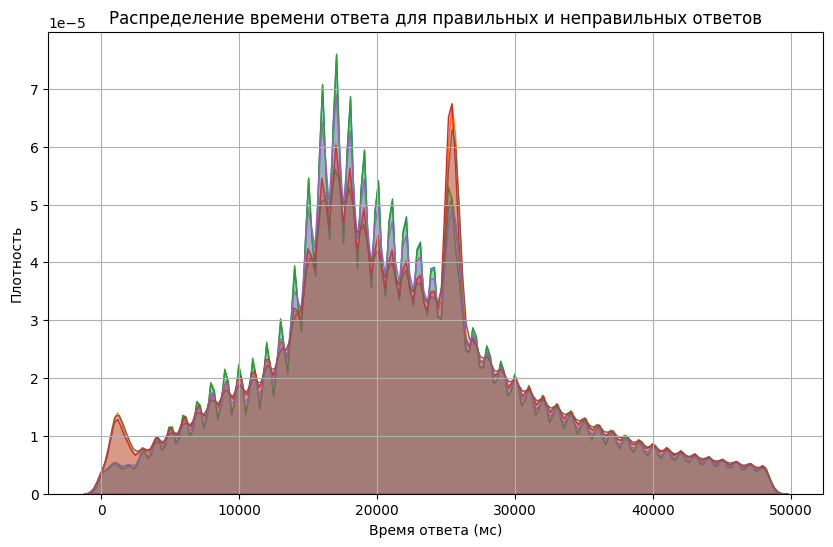

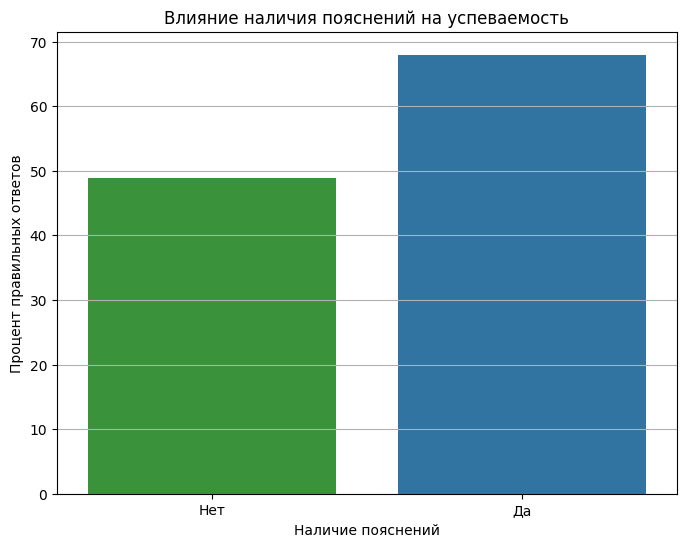

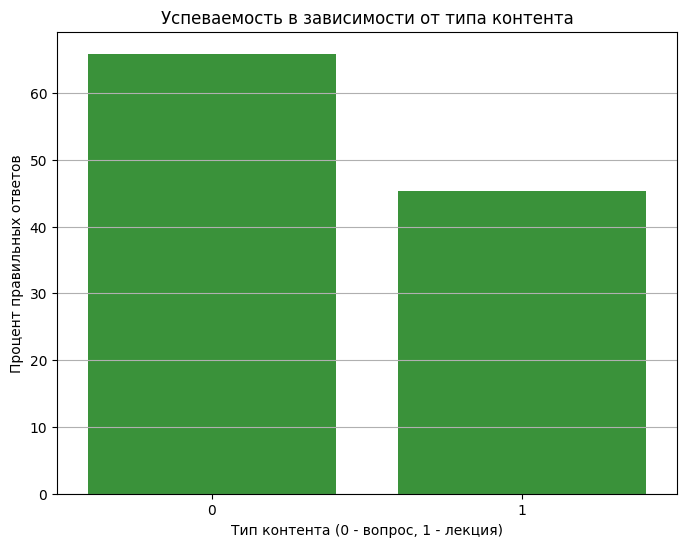

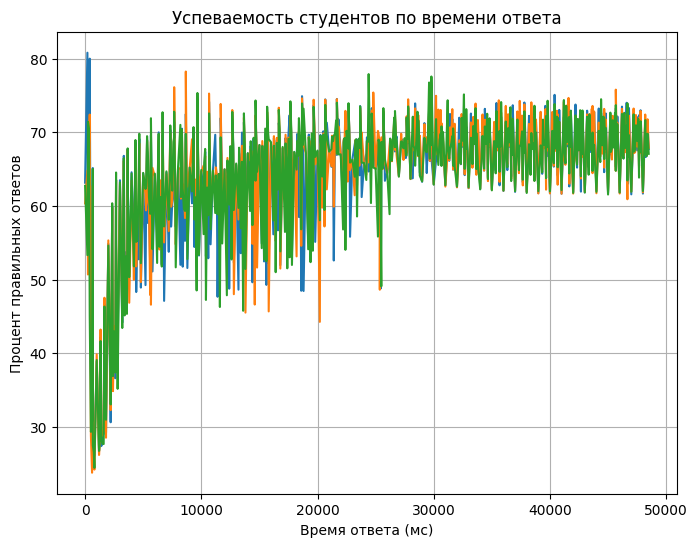

In [13]:
chunksize = 40000000  # Размер чанка

# Создаем фигуры для графиков заранее
fig_elapsed, ax_elapsed = plt.subplots(figsize=(10, 6))


fig_explanations, ax_explanations = plt.subplots(figsize=(8, 6))


fig_content_type, ax_content_type = plt.subplots(figsize=(8, 6))


fig_student_performance, ax_student_performance = plt.subplots(figsize=(8, 6))


# Настройка заголовков и меток
ax_elapsed.set_title('Распределение времени ответа для правильных и неправильных ответов')
ax_elapsed.set_xlabel('Время ответа (мс)')
ax_elapsed.set_ylabel('Плотность')


ax_explanations.set_title('Влияние наличия пояснений на успеваемость')
ax_explanations.set_xlabel('Наличие пояснений')
ax_explanations.set_ylabel('Процент правильных ответов')
ax_explanations.set_xticks([0, 1])
ax_explanations.set_xticklabels(['Нет', 'Да'])



ax_content_type.set_title('Успеваемость в зависимости от типа контента')
ax_content_type.set_xlabel('Тип контента (0 - вопрос, 1 - лекция)')
ax_content_type.set_ylabel('Процент правильных ответов')



ax_student_performance.set_title('Успеваемость студентов по времени ответа')
ax_student_performance.set_xlabel('Время ответа (мс)')
ax_student_performance.set_ylabel('Процент правильных ответов')



# Добавление сетки
ax_elapsed.grid(True)
ax_explanations.grid(True)
ax_content_type.grid(True)
ax_student_performance.grid(True)

def replace_nan_with_mean(data, column):
    mean_value = data[column].mean()
    data[column] = data[column].fillna(mean_value)

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for chunk in pd.read_csv('/content/drive/My Drive/train.csv', chunksize=chunksize):
    # Обработка чанка
    replace_nan_with_mean(chunk, 'prior_question_elapsed_time')
    replace_nan_with_mean(chunk, 'prior_question_had_explanation')
    chunk['answered_correctly'] = chunk['answered_correctly'].replace(-1, np.nan).ffill()

    # Удаление выбросов с помощью IQR
    chunk = remove_outliers_iqr(chunk, 'prior_question_elapsed_time')

    # Подготовка данных для графика 'elapsed'
    correct_answers = chunk[chunk['answered_correctly'] == 1]['prior_question_elapsed_time']
    incorrect_answers = chunk[chunk['answered_correctly'] == 0]['prior_question_elapsed_time']


    # Графики по частям
    sns.kdeplot(correct_answers, ax=ax_elapsed, label='Правильные ответы' if ax_elapsed.lines == [] else None, fill=True)
    sns.kdeplot(incorrect_answers, ax=ax_elapsed, label='Неправильные ответы' if ax_elapsed.lines == [] else None, fill=True)

    # Подготовка данных для графика 'explanations'
    explanation_counts = chunk.groupby(['prior_question_had_explanation', 'answered_correctly']).size().unstack()
    if explanation_counts is not None and not explanation_counts.empty:
        explanation_counts['percentage'] = explanation_counts[1] / (explanation_counts[0] + explanation_counts[1]) * 100


        sns.barplot(x=explanation_counts.index, y=explanation_counts['percentage'], ax=ax_explanations)

    # Подготовка данных для графика 'content_type'
    content_counts = chunk.groupby(['content_type_id', 'answered_correctly']).size().unstack()
    if content_counts is not None and not content_counts.empty:
        content_counts['percentage'] = content_counts[1] / (content_counts[0] + content_counts[1]) * 100

        sns.barplot(x=content_counts.index, y=content_counts['percentage'], ax=ax_content_type)

    # Новый график для успеваемости студентов по времени ответа
    student_performance_counts = chunk.groupby(['prior_question_elapsed_time', 'answered_correctly']).size().unstack()
    if student_performance_counts is not None and not student_performance_counts.empty:
        student_performance_counts['percentage'] = student_performance_counts[1] / (student_performance_counts[0] + student_performance_counts[1]) * 100

        sns.lineplot(x=student_performance_counts.index, y=student_performance_counts['percentage'], ax=ax_student_performance)

# Добавление легенды и отображение графиков
plt.show()


**Описание графиков**

<u>*1. Распределение времени ответа для правильных и неправильных ответов.*</u>

Данный график показывает распределение времени, которое требуется студентам для правильного и неправильного ответов на вопросы. По оси X отложено время в секундах, а по оси Y — процент правильных и неправильных ответов.

Из графика видно, что время ответа на вопросы имеет нормальное распределение, то есть большинство ответов попадает в средний диапазон времени, а количество ответов, которые требуют больше или меньше времени, уменьшается с увеличением отклонения от среднего значения.

Также можно заметить, что среднее время ответа для правильных ответов немного больше, чем для неправильных, что может свидетельствовать о том, что студенты обычно тратят больше времени на размышления над правильными ответами.

<u>*2. Влияние наличия пояснений на успеваемость.*</u>

Этот график показывает, как наличие или отсутствие пояснений к вопросам влияет на успеваемость студентов. По оси X отмечено наличие или отсутствие пояснений, а по оси Y – процент правильных ответов.

Можно заметить, что наличие пояснений положительно влияет на успеваемость, так как процент правильных ответов при наличии пояснений выше, чем при их отсутствии. Это может свидетельствовать о том, что пояснения помогают студентам лучше понять вопрос и найти правильный ответ.

<u>*3. Успеваемость в зависимости от типа контента.*</u>

На этом графике показана зависимость успеваемости студентов от типа контента, на основе которого составлены вопросы. По оси X отмечены разные типы контента, а по оси Y — процент правильных ответов на вопросы этого типа.

Здесь можно увидеть, что некоторые типы контента более успешны в плане вовлечения студентов и получения правильных ответов, чем другие. Это может быть связано с тем, что определённые типы контента лучше соответствуют интересам и уровню знаний студентов.

<u>*4. Успеваемость студентов по времени ответа.*</u>

График показывает зависимость успеваемости от времени, которое студенты тратят на ответ. По оси X отмечено время, а по оси Y — процент правильных ответов.

Чем больше времени студент тратит на ответ, тем больше вероятность, что он даст правильный ответ. Это может говорить о том, что более тщательная подготовка и размышления над вопросом повышают шансы на получение правильного ответа.

 ## Шаг 4. Анализ результатов и выводы

В данном исследовании были проанализированы данные о взаимодействии студентов с образовательным контентом, с целью выявления ключевых факторов, влияющих на успеваемость.  Анализ проводился на основе трех датасетов: `train.csv`, `lectures.csv` и `questions.csv`.  Из-за большого объема данных в `train.csv` (40 миллионов записей) для загрузки использовался метод чанкинга.


#### Ключевые характеристики данных

Анализ данных выявил наличие 155 158 уникальных пользователей и 13 771 уникальных контентов. Общий процент правильных ответов составил 62.52%.  Среднее время ответа (`prior_question_elapsed_time`) равно 25452.25 мс (медиана 21000 мс),  при этом 2.32% значений были пропущены.  Наличие пояснений к предыдущим вопросам (`prior_question_had_explanation`) существенно варьируется.  Большинство контента (около 95%) составляют вопросы, а оставшаяся часть — лекции.

#### Анализ графиков

**Анализ графиков позволил выявить следующие тенденции:**

* Распределение времени ответа:
  * Время ответа на вопросы приблизительно соответствует нормальному распределению.  Среднее время ответа на правильные вопросы немного выше, чем на неправильные, что может указывать на то, что студенты, уделяющие больше времени размышлению, чаще дают правильные ответы.  Это предполагает  положительную корреляцию между временем ответа и успеваемостью, но  требует  дополнительной  количественной  оценки.
* Влияние пояснений:  
  * График демонстрирует положительное влияние наличия пояснений на успеваемость.  Процент правильных ответов значительно выше в случае наличия пояснений, что подтверждает эффективность обратной связи в процессе обучения.

* Успеваемость и тип контента:  
  * График показал, что успеваемость зависит от типа контента.  Одни типы контента демонстрируют более высокую успеваемость, чем другие, что может быть связано с различиями в сложности,  интересе  к  теме  или  качестве  предоставления  информации.


#### Ключевые факторы, влияющие на успеваемость

**На основании анализа данных можно выделить следующие ключевые факторы, влияющие на успеваемость студентов:**

 * Наличие пояснений (`prior_question_had_explanation`):  
  * Явное и значительное положительное влияние на успеваемость.  Обратная связь  критична  для  эффективного  обучения.

 * Время ответа (`prior_question_elapsed_time`):  
  * Потенциально положительное влияние,  но  требует  более  глубокого  анализа  с  использованием  корреляционного  анализа  и/или  регрессионных  моделей  для  количественной  оценки  силы  влияния.

* Тип контента (`content_type_id`):  
  * Влияние  заметно,  но  требует  более  детального  исследования  для  понимания  причин  различий  в  успеваемости  в  зависимости  от  типа  контента.
* Качество  преподавания  и  дизайн  образовательного  контента (косвенно):   
  * Различия  в  успеваемости  в  зависимости  от  типа  контента  могут  указывать  на  различия  в  качестве  преподавания  и  дизайне  образовательного  материала.